# Results from OSM 2020 poster - February 2020

## What would you like to learn about?/What do you think is most important to the community?

The above are the questions that were posed to people during the poster session. Some categories of people, like modelers, eschewed voting for Big Data or Machine Learning in favor of topics like Structured Data and Reproducible Science as they felt they knew enough about those topics while the community at large should learn about the latter.

## Data Collection Notes

Some notes about data collection - people came up and put stickers on the poster, some during the poster session, some at other times. Not all people noticed the legend for the stickers, but during the poster session the majority that placed stickers did so according to the guidelines - we will assume the noise is small enough to not change rankings.

Not everyone placed three stickers, some only voted on one or two. Some people also came up in groups and decided to put one set of stickers as opposed to two or three sets. Some people saw the poster later and gave me their votes in person, I've also added them to the stickers counted up on the poster.

In [1]:
import numpy as np
import pandas as pd
import matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt

## Category Interpretation

Categories were left deliberately vague, in order to allow people to interpret as they will. There are both positive and negative effects of this, for example Large Project Datasets had the most votes, but for projects it is unclear what was voted on (Argo, OOI, GO-SHIP, etc). The 'canonical' ideas for those that area ambiguous when composing the poster are:

* Open Science - Open Access/Freely Available Data; this is someone interchangable with Reproducible Science
* Data Preparation - Data Cleaning, Data Munging, the process of turning data into a form one can work with
* Automated Pipelines - APIs, shell scripts, software engineering that automates human busywork
* Reproducible Science - Reproducible code/environments, citations/links, FAIR; this is someone interchangable with Open Science
* Field Setup / Software Infrastructure - Working without an internet connection for more than 24 hours
* Raw Sensor Data / Sensor Interfaces - Working with raw measurements from the sensor, how to store, how to convert into science units

### Whether or not people used these ideas when placing stickers is anyone's guess.

In [2]:
poster_results = pd.read_csv('ohw_osm2020_results.csv', delimiter=';')
poster_results

,Title,1,2,3
0,"Big Data / Cloud Computing (Pangeo, Xarray, Dask)",4,5,5
1,Machine Learning (Scikit-learn),5,8,1
2,"Visualization (Holoviews, Cartopy)",8,8,4
3,Open Science,5,6,5
4,Data Preparation,4,4,6
5,Automated Pipelines,1,1,9
6,"Structured Data (Standard Vocabularies, netCDF)",5,2,4
7,Reproducible Science (FAIR),5,4,3
8,"Large Project Datasets (Argo, OOI, GO-SHIP)",10,6,7
9,Field Setup / Software Infrastructure,2,2,4


## Votes Total

It looks like we had a total of <b>56 people</b> vote, with a total of <b>165 votes</b> casted.

In [3]:
#tabulate some statistics
rank_votes = poster_results.sum()[1:4]
rank_votes

1    56
2    56
3    53
dtype: object

## Votes by Category

The total number of votes per category. Make sure this cell is run before the cell right after, or you have to divide vote totals by two!

In [4]:
category_votes = poster_results.sum(axis=1)
category_votes

0     14
1     14
2     20
3     16
4     14
5     11
6     11
7     12
8     23
9      8
10    13
11     9
dtype: int64

In [5]:
#add a sorted column to the dataframe
poster_results['total_votes'] = category_votes
poster_results.sort_values('total_votes', ascending=False, inplace=True)
poster_results

,Title,1,2,3,total_votes
8,"Large Project Datasets (Argo, OOI, GO-SHIP)",10,6,7,23
2,"Visualization (Holoviews, Cartopy)",8,8,4,20
3,Open Science,5,6,5,16
0,"Big Data / Cloud Computing (Pangeo, Xarray, Dask)",4,5,5,14
1,Machine Learning (Scikit-learn),5,8,1,14
4,Data Preparation,4,4,6,14
10,Software Engineering Best Practices,4,7,2,13
7,Reproducible Science (FAIR),5,4,3,12
5,Automated Pipelines,1,1,9,11
6,"Structured Data (Standard Vocabularies, netCDF)",5,2,4,11


In [6]:
#generate individual datasets
labels = poster_results.iloc[0:12,0]
first = poster_results.iloc[0:12,1]
second = poster_results.iloc[0:12,2]
third = poster_results.iloc[0:12,3]

## Total votes cast

A quick chart showing total votes and breakdown of votes. It's probably not surprising that learning how to work with large project datasets and visualization are top on people's list, but it is somewhat surprising Open Science was third. 

<IPython.core.display.Javascript object>


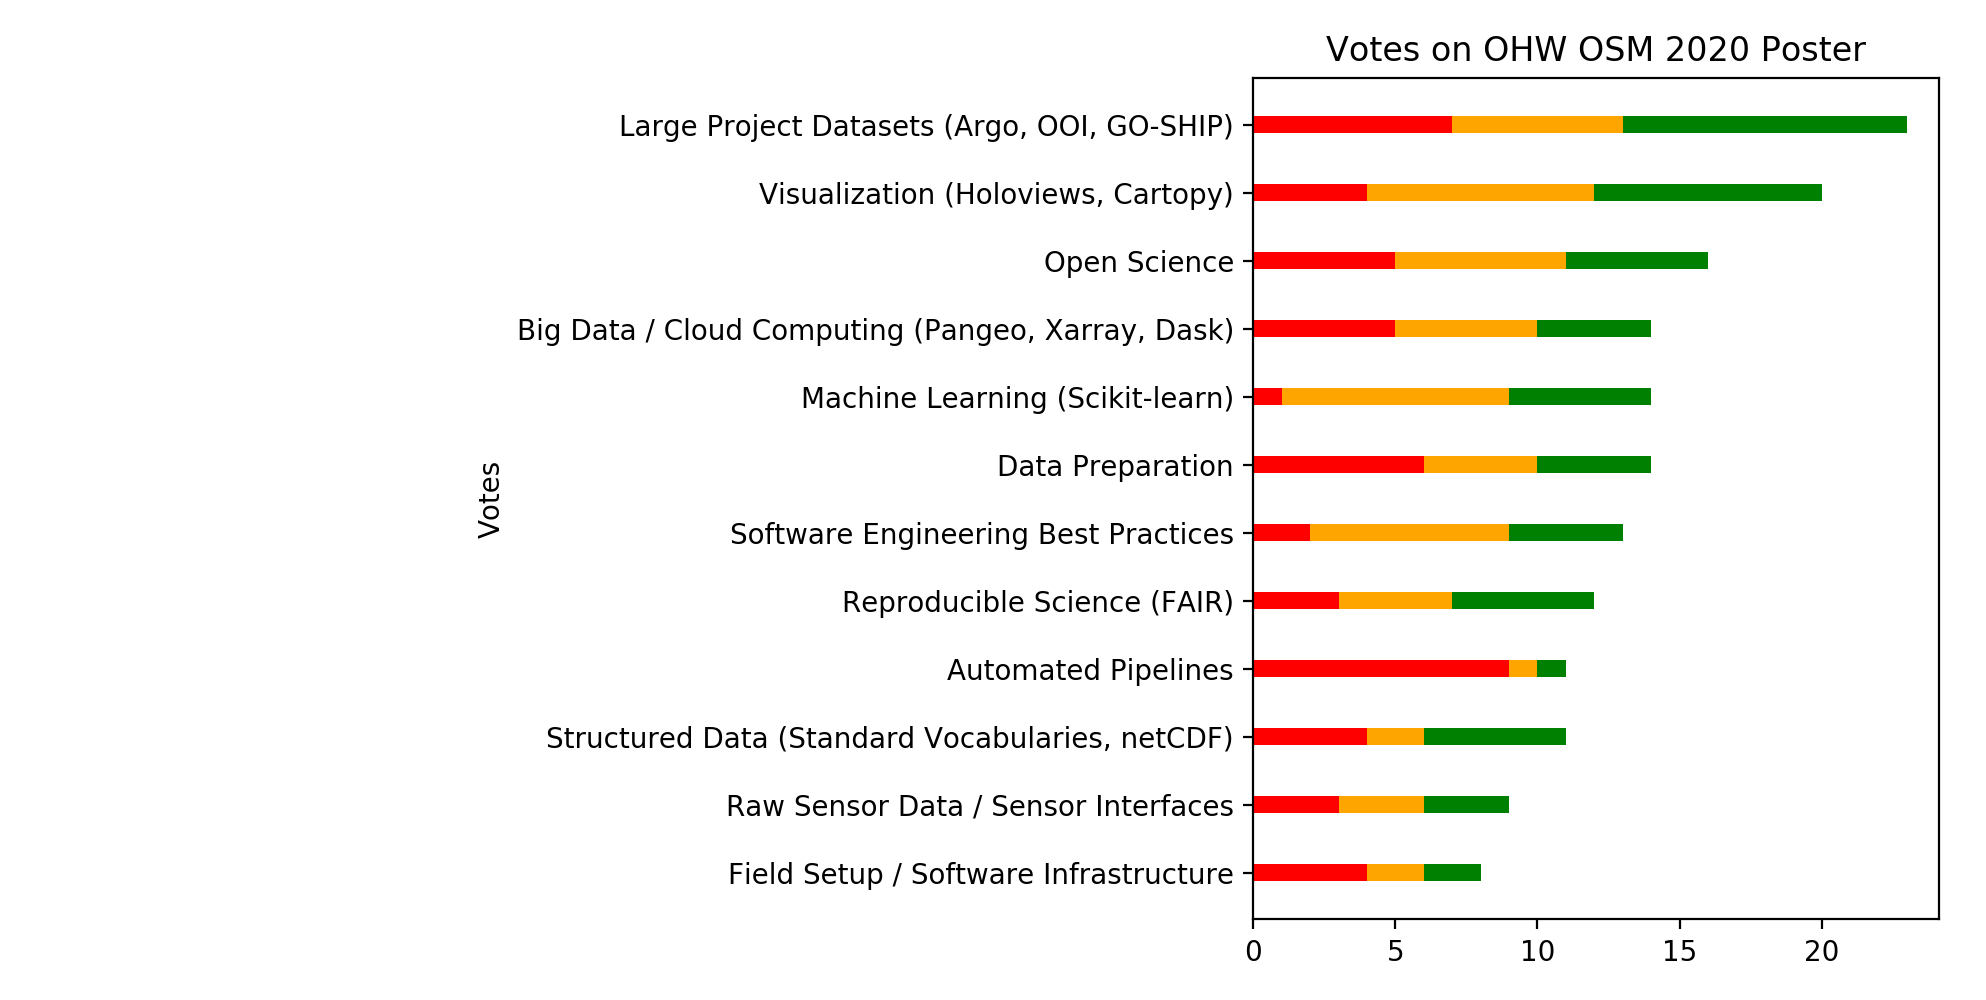

In [7]:
x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

r1 = np.arange(len(first))
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]
x_ticks = [1,2,3,4,5,6,7,8,9,0]

width = 0.25
ind = np.arange(len(first))

fig, ax = plt.subplots()
rects1 = ax.barh(ind, first, width, label='1st', color='green', left=second+third)
rects2 = ax.barh(ind, second, width, label='2nd', color='orange', left=third)
rects3 = ax.barh(ind, third, width, label='3rd', color='red')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Topics')
ax.set_yticks(x)
ax.set_yticklabels(labels)
ax.invert_yaxis()
ax.set_title('Votes on OHW OSM 2020 Poster')
#ax.set_xticklabels(labels)
ax.set_ylabel('Votes')
#ax.legend()

fig.tight_layout()

plt.show()

## Vote Breakdown of Categories

Looking at the vote breakdown by rank, an interesting thing that pops out is Automated Pipelines got a large number of third place votes. No one thought it should be a high focus, but definitely people think it's important enough to talk about consistently.

<IPython.core.display.Javascript object>


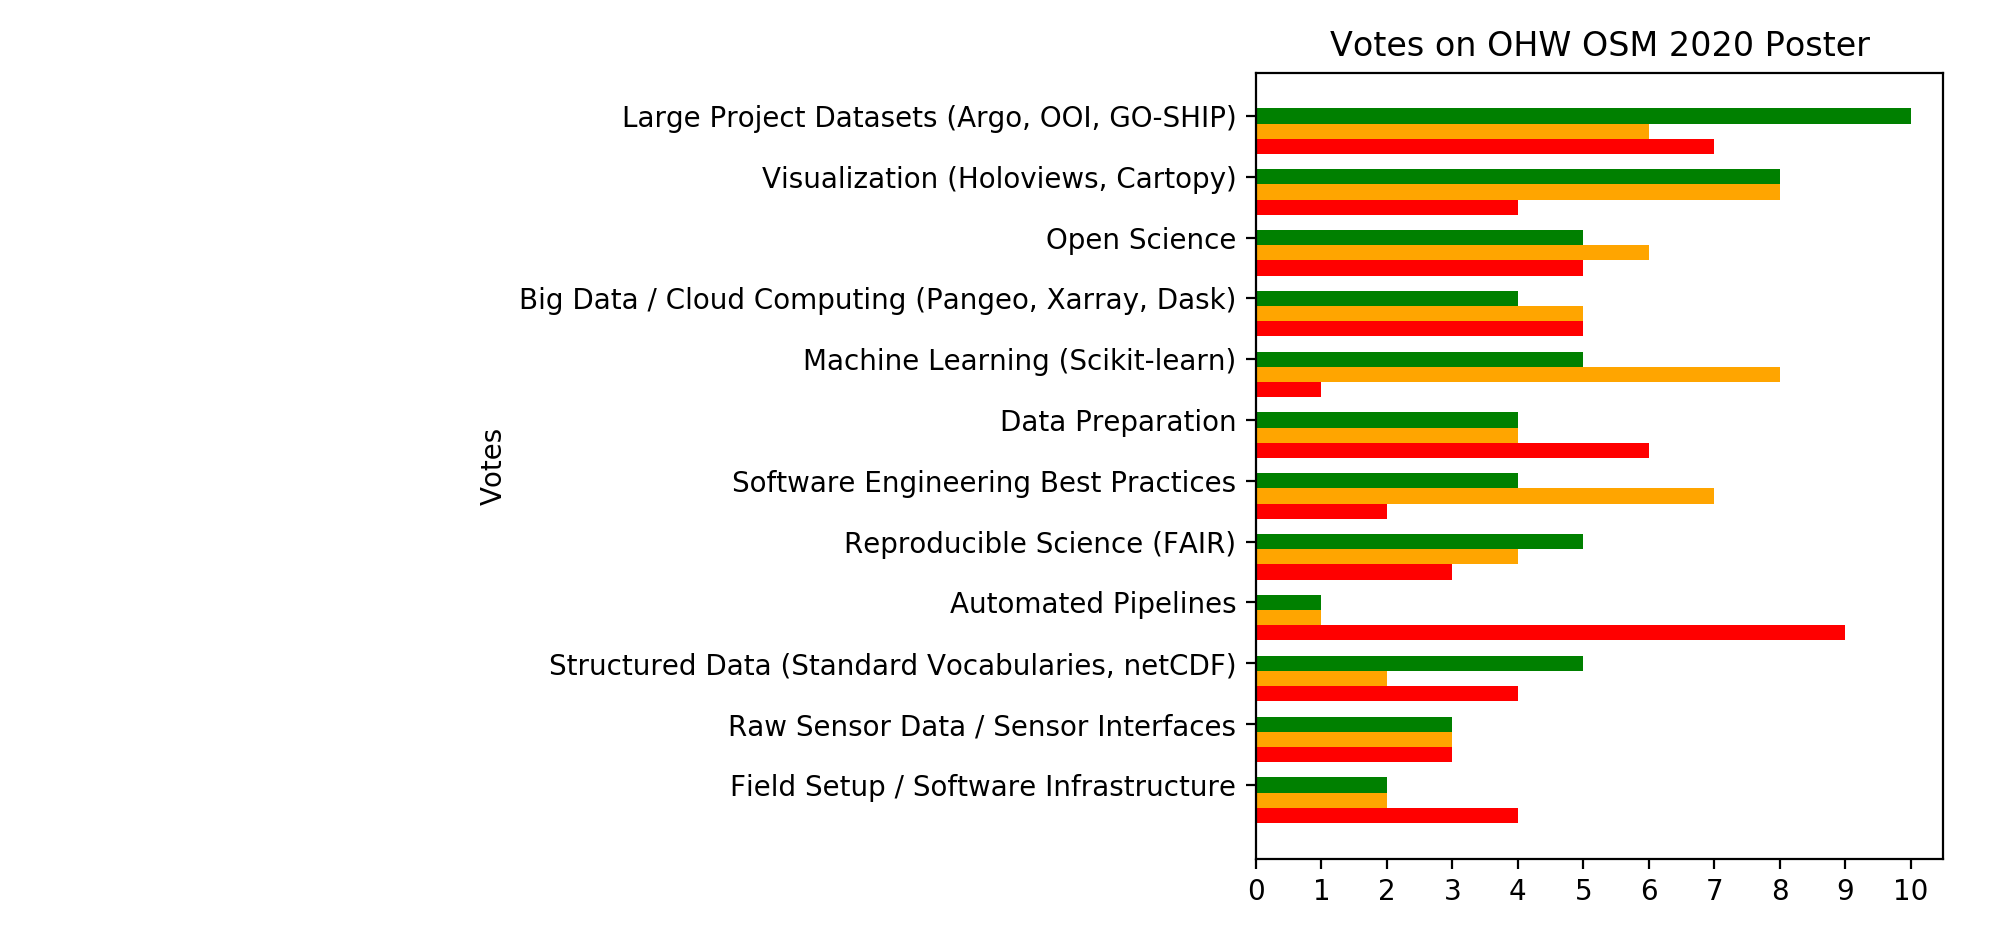

In [8]:
x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

r1 = np.arange(len(first))
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]
x_ticks = [0,1,2,3,4,5,6,7,8,9,10]

fig, ax = plt.subplots()
rects1 = ax.barh(r1, first, width, label='1st', color='green')
rects2 = ax.barh(r2, second, width, label='2nd', color='orange')
rects3 = ax.barh(r3, third, width, label='3rd', color='red')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Topics')
ax.set_yticks(x)
ax.set_yticklabels(labels)
ax.invert_yaxis()
ax.set_title('Votes on OHW OSM 2020 Poster')
ax.set_xticks(x_ticks)
#ax.set_xticklabels(labels)
ax.set_ylabel('Votes')
#ax.legend()

fig.tight_layout()

plt.show()

## Aggregated Categories

Some categories are different aspects of a broader field, for example Software Engineering Best Practices and Automated Pipelines both fall under Software Engineering. If we try to group the categories up into metacategories, one proposed look would be:

* Data Science - Big Data/Cloud Computing, Machine Learning, Data Preparation
* Accessible Science - Open Science, Reproducible Science, Structured Data
* Software Engineering - Software Engineering Best Practices, Automated Pipelines, Field Setup/Software Infrastructure
* Instrument Development(?) - Raw Sensor Data, Data Preparation

<b>Large Project Datasets</b> and <b>Visualization</b> are both big enough and diverse enough that they should stand on their own.

Whether or not these ideas were in people's minds as they voted is unknown, but we can look at possible trends:

In [9]:
#Sum up categories
poster_results

data_science = poster_results.loc[[0,1,4]].sum()
accessible_science = poster_results.loc[[3,7,6]].sum()
software_engineering = poster_results.loc[[10,5,9]].sum()
instrument_development = poster_results.loc[[11,4]].sum()

agg_results = pd.DataFrame([data_science, accessible_science,software_engineering, instrument_development,poster_results.loc[8],poster_results.loc[2]])

agg_results

,Title,1,2,3,total_votes
Unnamed 0,"Big Data / Cloud Computing (Pangeo, Xarray, Da...",13,17,12,42
Unnamed 1,Open ScienceReproducible Science (FAIR)Structu...,15,12,12,39
Unnamed 2,Software Engineering Best PracticesAutomated P...,7,10,15,32
Unnamed 3,Raw Sensor Data / Sensor InterfacesData Prepar...,7,7,9,23
8,"Large Project Datasets (Argo, OOI, GO-SHIP)",10,6,7,23
2,"Visualization (Holoviews, Cartopy)",8,8,4,20


## Vote Breakdown of Aggregate Categories

Looking at the previous table, Data Science is the winner, with Accessible Science right behind it. No surprise that Instrument Development is a niche thing given the proportion of engineers and people working with low level data relative to the rest of the community. Large Project Datasets and Visualization can hold their own against Instrument Development.

<IPython.core.display.Javascript object>


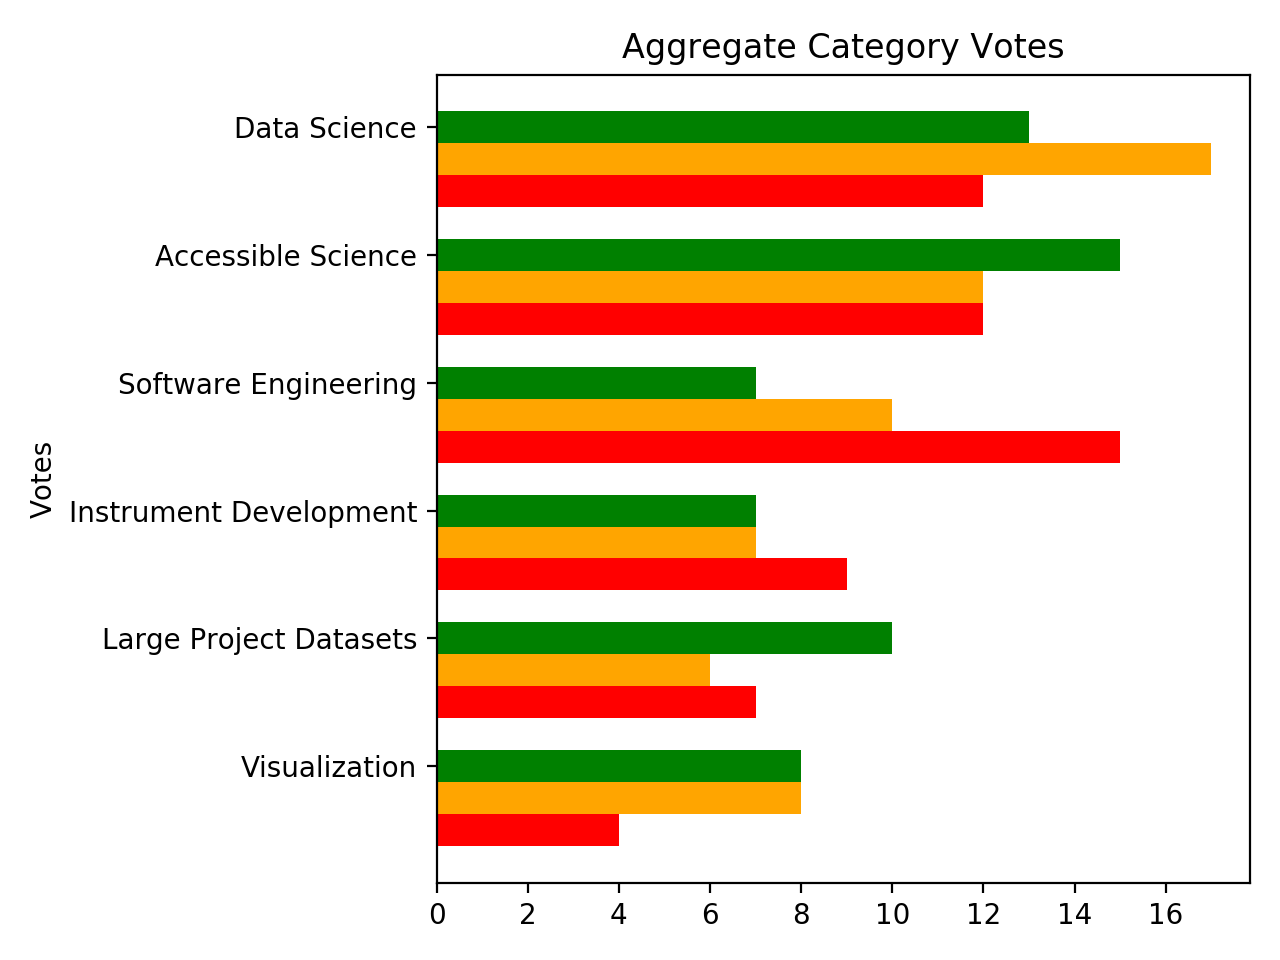

In [12]:
#generate individual datasets
labels = ['Data Science', 'Accessible Science', 'Software Engineering', 'Instrument Development', 'Large Project Datasets', 'Visualization']
first = agg_results.iloc[0:12,1]
second = agg_results.iloc[0:12,2]
third = agg_results.iloc[0:12,3]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

r1 = np.arange(len(first))
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]
x_ticks = [0,1,2,3,4,5,6,7,8,9,10]

fig, ax = plt.subplots()
rects1 = ax.barh(r1, first, width, label='1st', color='green')
rects2 = ax.barh(r2, second, width, label='2nd', color='orange')
rects3 = ax.barh(r3, third, width, label='3rd', color='red')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Aggregate Categories')
ax.set_yticks(x)
ax.set_yticklabels(labels)
ax.invert_yaxis()
ax.set_title('Aggregate Category Votes')
#ax.set_xticks()
#ax.set_xticklabels(labels)
ax.set_ylabel('Votes')
#ax.legend()

fig.tight_layout()

plt.show()

## What do the aggregate categories tell us? I'm not really sure.